<a href="https://colab.research.google.com/github/Manikandan-professional/Twitter-Analysis/blob/main/Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Necessary Packages**

In [385]:
import pandas as pd #Pandas for DataFrame Actions
import numpy as np #Numpy for Arithmetic Calculation
import matplotlib.pyplot as plt
from datetime import date
from textblob import TextBlob

# **Conversion of CSV file to DataFrame**

In [386]:
a='https://raw.githubusercontent.com/Manikandan-professional/Datasets/main/tweets.csv'

In [387]:
df=pd.DataFrame(pd.read_csv(a))
df.head()

,Unnamed: 0,Twitter Query: leading OR Indian OR retailers lang:en -filter:retweets -filter:replies,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Date,Screen Name,Full Name,Tweet Text,Tweet ID,Link(s),Media,Location,Retweets,Favorites,App,Followers,Follows,Listed,Verfied,User Since,Location,Bio,Website,Timezone,Profile Image
1,02/02/2022 18:49,@SeekingAlpha,Seeking Alpha,Indian Aluminum Supply Under Threat From Coal ...,1488864598866362371,https://seekingalpha.com/article/4483494-india...,NaN,NaN,0,0,SAArticlesTwitter,196522,75,4870,NaN,3/6/2009,"New York, NY",Seeking Alpha is the world’s largest investing...,https://bit.ly/3bBUVdb,NaN,View
2,02/02/2022 18:49,@mswaldia,wal_जनसँख्या_नियंत्रण,Chidambaram and Antonia shared indian economy ...,1488864579329347587,https://twitter.com/SureshNakhua/status/148852...,pic.twitter.com/1ioL0cYWFq,NaN,0,0,Twitter for Android,389,883,3,NaN,4/29/2011,NaN,"I am the person, who coined the word tukde tuk...",NaN,NaN,View
3,02/02/2022 18:49,@ynm1978,Naveen,South Indian Artist made this Lord Ganesha🙏 us...,1488864574145282051,NaN,https://pbs.twimg.com/media/FKmCcFWWUAYfF8Q.jpg,NaN,0,0,Twitter for Android,1141,1463,4,NaN,10/24/2014,NaN,"Industry: Aviation, Role model: PM Modi, Proud...",NaN,NaN,View
4,02/02/2022 18:49,@additionalrules,crypto&NFT&Metaverse news,cryptocurrency news. Crypto tax doesn't legali...,1488864573847322625,https://cointelegraph.com/news/crypto-tax-does...,NaN,NaN,0,0,SocialDog for Twitter,656,10,6,NaN,10/8/2019,MOON,fly me to the moon!!! #crypto #暗号資産 #가상통화 #NFT...,NaN,NaN,View


# **Number of Rows and Columns**

In [388]:
df.shape

(2477, 21)

# **Old and New Columns value and renaming**

In [389]:
old=[]
new=[]
for i in range(0,len(df.columns),1):
  old.append(df.columns[i])
for i in range(0,df.shape[1],1):
  new.append(df.iloc[0][i])
for i in range(0,df.shape[1],1):
  df=df.rename(columns={old[i]:new[i]})

In [390]:
df.head(2)

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,Link(s),Media,Location,Retweets,Favorites,App,Followers,Follows,Listed,Verfied,User Since,Location,Bio,Website,Timezone,Profile Image
0,Date,Screen Name,Full Name,Tweet Text,Tweet ID,Link(s),Media,Location,Retweets,Favorites,App,Followers,Follows,Listed,Verfied,User Since,Location,Bio,Website,Timezone,Profile Image
1,02/02/2022 18:49,@SeekingAlpha,Seeking Alpha,Indian Aluminum Supply Under Threat From Coal ...,1488864598866362371,https://seekingalpha.com/article/4483494-india...,NaN,NaN,0,0,SAArticlesTwitter,196522,75,4870,NaN,3/6/2009,"New York, NY",Seeking Alpha is the world’s largest investing...,https://bit.ly/3bBUVdb,NaN,View


# **Removing the first row since we have renamed it with column value**

In [391]:
df=df.drop(df.index[0],axis=0)

In [392]:
df.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,Link(s),Media,Location,Retweets,Favorites,App,Followers,Follows,Listed,Verfied,User Since,Location,Bio,Website,Timezone,Profile Image
1,02/02/2022 18:49,@SeekingAlpha,Seeking Alpha,Indian Aluminum Supply Under Threat From Coal ...,1488864598866362371,https://seekingalpha.com/article/4483494-india...,NaN,NaN,0,0,SAArticlesTwitter,196522,75,4870,NaN,3/6/2009,"New York, NY",Seeking Alpha is the world’s largest investing...,https://bit.ly/3bBUVdb,NaN,View
2,02/02/2022 18:49,@mswaldia,wal_जनसँख्या_नियंत्रण,Chidambaram and Antonia shared indian economy ...,1488864579329347587,https://twitter.com/SureshNakhua/status/148852...,pic.twitter.com/1ioL0cYWFq,NaN,0,0,Twitter for Android,389,883,3,NaN,4/29/2011,NaN,"I am the person, who coined the word tukde tuk...",NaN,NaN,View
3,02/02/2022 18:49,@ynm1978,Naveen,South Indian Artist made this Lord Ganesha🙏 us...,1488864574145282051,NaN,https://pbs.twimg.com/media/FKmCcFWWUAYfF8Q.jpg,NaN,0,0,Twitter for Android,1141,1463,4,NaN,10/24/2014,NaN,"Industry: Aviation, Role model: PM Modi, Proud...",NaN,NaN,View
4,02/02/2022 18:49,@additionalrules,crypto&NFT&Metaverse news,cryptocurrency news. Crypto tax doesn't legali...,1488864573847322625,https://cointelegraph.com/news/crypto-tax-does...,NaN,NaN,0,0,SocialDog for Twitter,656,10,6,NaN,10/8/2019,MOON,fly me to the moon!!! #crypto #暗号資産 #가상통화 #NFT...,NaN,NaN,View
5,02/02/2022 18:49,@AndySchmeltz,Andy Schmeltz,How are those New Year’s resolutions coming? I...,1488864572274614276,https://www.forbes.com/sites/forbescoachescoun...,NaN,NaN,0,0,Twitter Web App,1972,267,5,NaN,5/31/2019,"New York, NY",Striving to change the trajectory of cancer @P...,https://andy-schmeltz.medium.com/,NaN,View


In [393]:
df.columns

Index(['Date', 'Screen Name', 'Full Name', 'Tweet Text', 'Tweet ID', 'Link(s)',
       'Media', 'Location', 'Retweets', 'Favorites', 'App', 'Followers',
       'Follows', 'Listed', 'Verfied', 'User Since', 'Location', 'Bio',
       'Website', 'Timezone', 'Profile Image'],
      dtype='object')

In [394]:
df=df.drop(columns=['Full Name','Screen Name','Tweet ID','Link(s)','Media','Media', 'Location', 'Retweets', 'Favorites', 'App', 'Followers',
       'Follows', 'Listed', 'Verfied', 'User Since', 'Location', 'Bio',
       'Website', 'Timezone', 'Profile Image'])

# **Final Dataset which is going to use for our analysis**

In [395]:
df.head()
df=df.reset_index()

# **Data Cleaning**

In [396]:
df=df.dropna()

In [397]:
df

,index,Date,Tweet Text
0,1,02/02/2022 18:49,Indian Aluminum Supply Under Threat From Coal ...
1,2,02/02/2022 18:49,Chidambaram and Antonia shared indian economy ...
2,3,02/02/2022 18:49,South Indian Artist made this Lord Ganesha🙏 us...
3,4,02/02/2022 18:49,cryptocurrency news. Crypto tax doesn't legali...
4,5,02/02/2022 18:49,How are those New Year’s resolutions coming? I...
...,...,...,...
2471,2472,02/02/2022 17:16,"Using @tailwindcss for the past 1 year, top 2 ..."
2472,2473,02/02/2022 17:16,"man i went to 4 different temples, 2 of heroic..."
2473,2474,02/02/2022 17:16,Migrant Workers are vital to the Indian econom...
2474,2475,02/02/2022 17:16,Disappointing to hear that Keegan Petersen wil...


In [398]:
df=df.drop(columns=['index'])

In [399]:
for i in range(0,df.shape[0],1):
  df['Tweet Text'][i]=df['Tweet Text'][i].lower()

In [400]:
df

,Date,Tweet Text
0,02/02/2022 18:49,indian aluminum supply under threat from coal ...
1,02/02/2022 18:49,chidambaram and antonia shared indian economy ...
2,02/02/2022 18:49,south indian artist made this lord ganesha🙏 us...
3,02/02/2022 18:49,cryptocurrency news. crypto tax doesn't legali...
4,02/02/2022 18:49,how are those new year’s resolutions coming? i...
...,...,...
2471,02/02/2022 17:16,"using @tailwindcss for the past 1 year, top 2 ..."
2472,02/02/2022 17:16,"man i went to 4 different temples, 2 of heroic..."
2473,02/02/2022 17:16,migrant workers are vital to the indian econom...
2474,02/02/2022 17:16,disappointing to hear that keegan petersen wil...


# **Splitting of Date and Time**

In [401]:
df['Year']=""

In [402]:
df['Date'][0][0:10]

'02/02/2022'

In [403]:
for i in range(0,df.shape[0],1):
  df['Year'][i]=df['Date'][i][6:10]

In [404]:
df.head()

,Date,Tweet Text,Year
0,02/02/2022 18:49,indian aluminum supply under threat from coal ...,2022
1,02/02/2022 18:49,chidambaram and antonia shared indian economy ...,2022
2,02/02/2022 18:49,south indian artist made this lord ganesha🙏 us...,2022
3,02/02/2022 18:49,cryptocurrency news. crypto tax doesn't legali...,2022
4,02/02/2022 18:49,how are those new year’s resolutions coming? i...,2022


In [405]:
df['Tweet Text'][0]

'indian aluminum supply under threat from coal crisis.  #stocks #business #markets'

In [406]:
df['subjectivity']=0
df['polarity']=0

In [407]:
df.head(1)

,Date,Tweet Text,Year,subjectivity,polarity
0,02/02/2022 18:49,indian aluminum supply under threat from coal ...,2022,0,0


In [408]:
for i in range(0,df.shape[0],1):
  # w = df['Tweet Text'][i]
  # w.lemmatize("v") ## v here represents verb
  text=TextBlob(df['Tweet Text'][i])
  df['subjectivity'][i]=text.sentiment[0]
  df['polarity'][i]=text.sentiment[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [409]:
df

,Date,Tweet Text,Year,subjectivity,polarity
0,02/02/2022 18:49,indian aluminum supply under threat from coal ...,2022,0,0
1,02/02/2022 18:49,chidambaram and antonia shared indian economy ...,2022,0,0
2,02/02/2022 18:49,south indian artist made this lord ganesha🙏 us...,2022,0,0
3,02/02/2022 18:49,cryptocurrency news. crypto tax doesn't legali...,2022,0,0
4,02/02/2022 18:49,how are those new year’s resolutions coming? i...,2022,0,0
...,...,...,...,...,...
2471,02/02/2022 17:16,"using @tailwindcss for the past 1 year, top 2 ...",2022,0,0
2472,02/02/2022 17:16,"man i went to 4 different temples, 2 of heroic...",2022,0,0
2473,02/02/2022 17:16,migrant workers are vital to the indian econom...,2022,0,0
2474,02/02/2022 17:16,disappointing to hear that keegan petersen wil...,2022,0,0


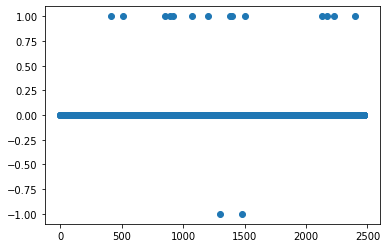

In [410]:
plt.scatter(df.index,df.polarity)

In [411]:
!pip install vaderSentiment

In [412]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [413]:
analyzer = SentimentIntensityAnalyzer()

In [414]:
analyzer.polarity_scores('Horrible bad day.')

{'compound': -0.7906, 'neg': 0.875, 'neu': 0.125, 'pos': 0.0}

In [415]:
sentiment = df['Tweet Text'].apply(analyzer.polarity_scores)

In [416]:
sentiment_df = pd.DataFrame(sentiment.tolist())

sentiment_df.head()

,neg,neu,pos,compound
0,0.455,0.545,0.000,-0.8176
1,0.026,0.822,0.152,0.8897
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,0.853,0.147,0.7351


In [417]:
final = pd.concat([df,sentiment_df], join = 'outer', axis = 1)
final

,Date,Tweet Text,Year,subjectivity,polarity,neg,neu,pos,compound
0,02/02/2022 18:49,indian aluminum supply under threat from coal ...,2022,0,0,0.455,0.545,0.000,-0.8176
1,02/02/2022 18:49,chidambaram and antonia shared indian economy ...,2022,0,0,0.026,0.822,0.152,0.8897
2,02/02/2022 18:49,south indian artist made this lord ganesha🙏 us...,2022,0,0,0.000,1.000,0.000,0.0000
3,02/02/2022 18:49,cryptocurrency news. crypto tax doesn't legali...,2022,0,0,0.000,1.000,0.000,0.0000
4,02/02/2022 18:49,how are those new year’s resolutions coming? i...,2022,0,0,0.000,0.853,0.147,0.7351
...,...,...,...,...,...,...,...,...,...
2471,02/02/2022 17:16,"using @tailwindcss for the past 1 year, top 2 ...",2022,0,0,0.042,0.923,0.035,-0.1027
2472,02/02/2022 17:16,"man i went to 4 different temples, 2 of heroic...",2022,0,0,0.000,0.731,0.269,0.7096
2473,02/02/2022 17:16,migrant workers are vital to the indian econom...,2022,0,0,0.000,0.762,0.238,0.3595
2474,02/02/2022 17:16,disappointing to hear that keegan petersen wil...,2022,0,0,0.163,0.837,0.000,-0.7351


In [418]:
final=final.rename(columns={'neg':'Negative','neu':'Neutral','pos':'Positive','compound':'compound'})
final.head()

,Date,Tweet Text,Year,subjectivity,polarity,Negative,Neutral,Positive,compound
0,02/02/2022 18:49,indian aluminum supply under threat from coal ...,2022,0,0,0.455,0.545,0.000,-0.8176
1,02/02/2022 18:49,chidambaram and antonia shared indian economy ...,2022,0,0,0.026,0.822,0.152,0.8897
2,02/02/2022 18:49,south indian artist made this lord ganesha🙏 us...,2022,0,0,0.000,1.000,0.000,0.0000
3,02/02/2022 18:49,cryptocurrency news. crypto tax doesn't legali...,2022,0,0,0.000,1.000,0.000,0.0000
4,02/02/2022 18:49,how are those new year’s resolutions coming? i...,2022,0,0,0.000,0.853,0.147,0.7351


In [432]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [454]:
temp=''
sentence=[]
for i in range(0,final.shape[0],1): 
    idx=final['Tweet Text'][i].split(' ')
    for j in range(0,len(idx),1):
      
      if idx[j] not in STOPWORDS and idx[j]!=' ':
              print(idx[j])
              temp=temp+idx[j]+' '
    sentence.append(temp)
    temp=[]

indian
aluminum
supply
threat
coal
crisis.

#stocks
#business
#markets
chidambaram


TypeError: ignored

In [448]:
sentence

['indian aluminum supply threat coal crisis.  #stocks #business #markets ']

In [425]:
total=final.shape[0]
neg=final['Negative'].sum()
neu=final['Neutral'].sum()
pos=final['Positive'].sum()
print('Negative Average',round((neg/total)*100,2))
print('Neutral Average',round((neu/total)*100,2))
print('Positive Average',round((pos/total)*100,2))

Negative Average 4.83
Neutral Average 84.42
Positive Average 10.75
